# Getting to Grips with MySQL

Here we use the MySQL database, specifically the "energies" table, populated using  bin/`fill_db.py`. We will do some basic analysis of the data using pandas and matplotlib

In [2]:
%matplotlib inline
import numpy as np
import MySQLdb
import pandas as pd
import matplotlib.pyplot as plt

# Create DF from SQL database

In [4]:
db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="XXX",  # your password
                     db="molecular_rotors")        # name of the data base

cur = db.cursor()
table_name="energies"


The database has been read in, and we can now use the power of the pandas library to explore it. First, we must use "cur" instance to initialise a pandas dataframe

In [5]:
cur.execute("SHOW columns FROM energies")
column_names=[column[0] for column in cur.fetchall()]
cur.execute("SELECT * FROM energies")
rows=cur.fetchall()
df=pd.DataFrame([[j for j in i]for i in rows],columns=column_names)

In [6]:
df.head()

,model,level_of_theory,FC_s0,FC_s1,FC_s2,FC_s3,FC_s4,FC_s5,FC_t1,FC_t2,...,s1min_s0,s1min_s1,s1min_t1,t1min_s0,t1min_s1,t1min_t1,CI_s0s1_s0,CI_s0s1_s1,CI_s0t1_s0,CI_s0t1_t1
0,m1,DFT,-695.686744818,-695.503586195,-695.497721003,-695.494082820,-695.464525340,-695.461405322,-695.563017199,-695.543536383,...,-695.669782973,-695.522047022,-695.587280744,-695.661158174,-695.520639790,-695.588508438,None,None,-695.590631000,-695.590183000
1,m4,DFT,-577.752919551,-577.568544525,-577.562208942,-577.559864335,-577.529347698,-577.526789945,-577.628534119,-577.609655992,...,-577.735611575,-577.587118588,-577.652826376,-577.726965823,-577.585661003,-577.653992693,None,None,-577.654791000,-577.654332000
2,m1,cc2,-694.276141541,-694.104407541,-694.094355141,-694.090692741,-694.051684441,-694.044767241,-694.137791541,-694.116930241,...,-694.276161742,-694.124652942,-694.159156342,-694.258274290,-694.109426090,-694.159287790,None,None,-694.134038000,-694.133371000
3,m4,cc2,-576.618580593,-576.445150793,-576.436292493,-576.430316693,-576.392019893,-576.385996593,-576.479267293,-576.458505593,...,-576.609318089,-576.456442989,-576.491984389,-576.600475682,-576.450355482,-576.501003282,-576.439940449,-576.413864449,-576.473825728,-576.473187754


In [7]:
df.describe()

,model,level_of_theory,FC_s0,FC_s1,FC_s2,FC_s3,FC_s4,FC_s5,FC_t1,FC_t2,...,s1min_s0,s1min_s1,s1min_t1,t1min_s0,t1min_s1,t1min_t1,CI_s0s1_s0,CI_s0s1_s1,CI_s0t1_s0,CI_s0t1_t1
count,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,1,1,4,4
unique,2,2,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,1,1,4,4
top,m4,cc2,-695.686744818,-694.104407541,-694.094355141,-694.090692741,-576.392019893,-576.385996593,-695.563017199,-694.116930241,...,-577.735611575,-577.587118588,-576.491984389,-695.661158174,-576.450355482,-577.653992693,-576.439940449,-576.413864449,-577.654791000,-694.133371000
freq,2,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


The data has singlet and triplet energies at four key geometries: FC, s1min, t1min, and CI. Lets take a look at the resultant energy diagrams

# VEs and Plots

In [9]:
s0=["FC_s0","s1min_s0","t1min_s0","CI_s0t1_s0"]
s1=["FC_s1","s1min_s1","t1min_s1","CI_s0t1_t1"]
t1=["FC_t1","s1min_t1","t1min_t1","CI_s0t1_t1"]

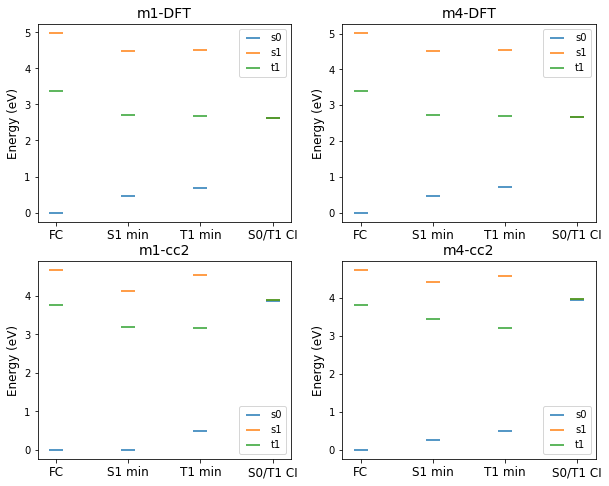

In [11]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
axs = axs.ravel()
for i in range(len(df)):
   
    s0vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,s0]]
    x=range(len(s0vals))
    axs[i].scatter(x,s0vals,marker="_",s=200,label="s0")
    s1vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,s1]]
    axs[i].scatter(x,s1vals,marker="_",s=200,label="s1")
    t1vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,t1]]
    axs[i].scatter(x,t1vals,marker="_",s=200,label="t1")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(["FC","S1 min", "T1 min","S0/T1 CI"],fontsize=12)
    axs[i].set_title(str(df["model"][i])+"-"+str(df["level_of_theory"][i]),fontsize=14)
    axs[i].legend()
    axs[i].set_ylabel("Energy (eV)",fontsize=12)

I would like to add some more data values at the FC position on the x-axis. I am not interested in adding these to the df at this stage, so will just create lists and plot these separately

In [12]:
m1_DFT_triplets=[3.3668,3.8969,4.1470,4.5922,4.6324]
m1_DFT_singlets=[4.9840,5.1436,5.2426,6.0469,6.1318]
m4_DFT_triplets=[3.3847,3.8984,4.1909,4.6038,4.6428]
m4_DFT_singlets=[5.017,5.1895, 5.2533, 6.0837, 6.1533]
m1_cc2_triplets=[3.76469,4.33236,4.45216]
m1_cc2_singlets=[4.67312,4.94666,5.04632,6.10779,6.29602]
m4_cc2_triplets=[ 3.79091,4.35586,4.48789]
m4_cc2_singlets=[4.71926,4.96031,5.12292,6.16503,6.32893]

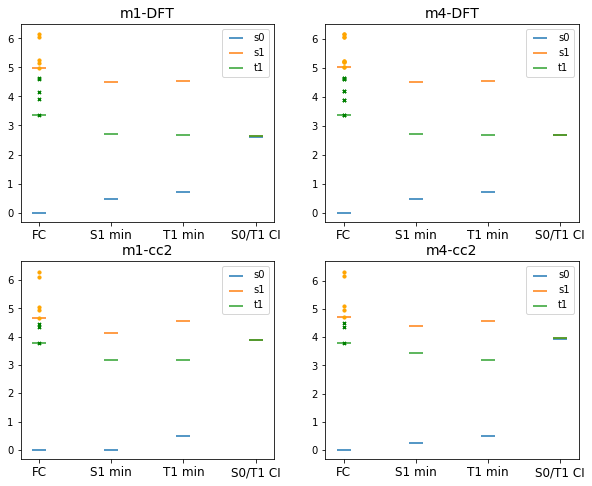

In [13]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
axs = axs.ravel()
for i in range(len(df)):
   
    s0vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,s0]]
    x=range(len(s0vals))
    axs[i].scatter(x,s0vals,marker="_",s=200,label="s0")
    s1vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,s1]]
    axs[i].scatter(x,s1vals,marker="_",s=200,label="s1")
    t1vals=[((float((j))-float(df.loc[i,s0[0]]))*27.2114) for j in df.loc[i,t1]]
    axs[i].scatter(x,t1vals,marker="_",s=200,label="t1")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(["FC","S1 min", "T1 min","S0/T1 CI"],fontsize=12)
    axs[i].set_title(str(df["model"][i])+"-"+str(df["level_of_theory"][i]),fontsize=14)
    axs[i].legend()
for y in m1_DFT_triplets:
    axs[0].scatter(0,y,marker="x",c='g',s=10)
for y in m1_DFT_singlets:
    axs[0].scatter(0,y,marker="o",c='orange',s=10)

for y in m4_DFT_triplets:
    axs[1].scatter(0,y,marker="x",c='g',s=10)
for y in m4_DFT_singlets:
    axs[1].scatter(0,y,marker="o",c='orange',s=10)
    
for y in m4_DFT_triplets:
    axs[1].scatter(0,y,marker="x",c='g',s=10)
for y in m4_DFT_singlets:
    axs[1].scatter(0,y,marker="o",c='orange',s=10)
    
for y in m1_cc2_triplets:
    axs[2].scatter(0,y,marker="x",c='g',s=10)
for y in m1_cc2_singlets:
    axs[2].scatter(0,y,marker="o",c='orange',s=10)
    
for y in m4_cc2_triplets:
    axs[3].scatter(0,y,marker="x",c='g',s=10)
for y in m4_cc2_singlets:
    axs[3].scatter(0,y,marker="o",c='orange',s=10)


There we go. A plot for each of my models, showing the mechanism of excited state relaxation in triplet and singlet states. The key to this example is not what is shown on the data, but the process used to extract, store, and analyze.

If you made it this far, thank you.

md